In [1]:
%load_ext autoreload
%autoreload 2
from fun import *

In [2]:
# create_database('/home/msarrias/data/Homo_sapiens.GRCh38.105.chromosome.1.gff3', '/home/msarrias/dbs/homo_1.db')

# read db using the gffutils library
db_filename = '/home/msarrias/dbs/homo_1.db'
db = gffutils.FeatureDB(db_filename, keep_order=True)
annot_dict = get_annotations_dict(db)

In [3]:
df_stats = pd.DataFrame(basic_stat(annot_dict), index =list(db.featuretypes()) + ['Total'])
df_stats

,Number,Size total (kb),Size mean (bp)
CDS,78738,11768.14,149.46
biological_region,16825,5463.90,324.75
chromosome,1,248956.42,248956421.00
exon,143325,38321.88,267.38
five_prime_UTR,14466,1863.76,128.84
gene,2092,119519.80,57131.84
lnc_RNA,10179,263236.20,25860.71
mRNA,9387,501516.00,53426.65
miRNA,158,12.63,79.92
ncRNA,192,39.10,203.64


In [4]:
# mRNA parent - child annotations

# parent_dic, parent_child_dic = create_parent_child_dic(annot_dict)
# dump_parent_child_dict(parent_dic, parent_child_dic,'../files/parent_child_dic_human_01.pkl')

with open('../files/parent_child_dic_human_01.pkl', 'rb') as handle:
    merged_dict = pickle.load(handle)

In [5]:
# compute intron regions using bedtools
mRNA_parent_dic, parents_exon_coverage = get_exon_overlaps(merged_dict['parent_child_dic'], 
                                                           merged_dict['parent_dic'])

In [6]:
transcripts_summary = get_summary_dict(mRNA_parent_dic)
df_stats = pd.DataFrame(transcripts_summary)

In [9]:
df_stats

,transcript_id,transcript_len,n_exons,total_exon_len,n_introns,total_intron_len
0,transcript:ENST00000641515,6167,3,2618,2,2618
1,transcript:ENST00000426406,939,1,939,0,939
2,transcript:ENST00000332831,939,1,939,0,939
3,transcript:ENST00000616016,20652,14,3465,13,3465
4,transcript:ENST00000618323,20652,14,3468,13,3468
...,...,...,...,...,...,...
9383,transcript:ENST00000528141,1695,4,576,3,576
9384,transcript:ENST00000530986,1617,4,595,3,595
9385,transcript:ENST00000355360,13751,3,2879,2,2879
9386,transcript:ENST00000329291,12912,3,2717,2,2717


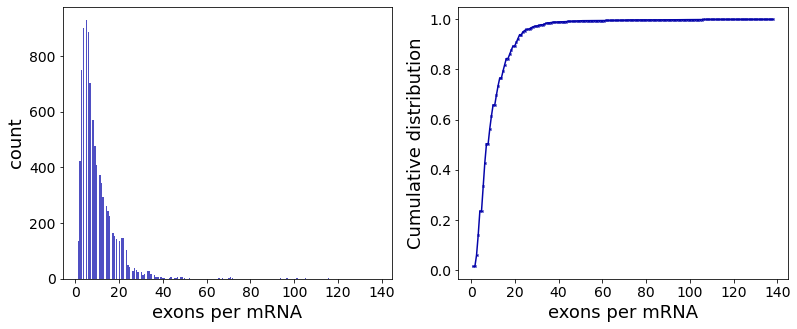

In [8]:
exons_counts = transcripts_summary['n_exons'][:-1]
plot_hist_cdf(exons_counts)